<a href="https://colab.research.google.com/github/norrilsk/GraphCourse/blob/main/lectures/Graph_Course_lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Алгоритмы на графах. Занятие № 2

## Поиск в ширину

Пусть задан граф $G = (V,E)$ и выделена **исходная** $s$ вершина. Алгоритм поиска в ширину систематически обходит все ребра $G$ для открытия всех вершин, достижимых из $s$, вычисляя при этом расстояние (минимальное количество ребер) от s до каждой достижимой вершины.

In [1]:
#%matplotlib notebook
#from matplotlib import rc
from IPython.display import HTML
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt
import pydot
import copy
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.animation as animation

class AdjacencyListGraph:
  def __init__ (self):
    self.adjacency_list = []
    self.color_map = []
    self.animation_frames = []

  def saveFrame (self):
    self.animation_frames.append([copy.deepcopy(self.adjacency_list), copy.deepcopy(self.color_map)])

  def addEdge (self, u,v, bidirectional = True):
    n_max = max(u,v)
    if (len (self.adjacency_list) < n_max +1):
      self.addVert(n_max)
    self.adjacency_list[u].append (v)
    if bidirectional:
      self.adjacency_list[v].append (u)

  def addVert(self, u):
    while (len (self.adjacency_list) < u +1):
      self.adjacency_list.append ([])
      self.color_map.append('blue')

  def numVerts(self):
    return len(self.adjacency_list);

  def paintVert(self, u, color):
    self.color_map[u] = color;

  def print (self):
    print (self.adjacency_list)

  def visualize(self):
        Gnx = nx.Graph()
        visual = []
        for u in range(len(self.adjacency_list)):
          for v in self.adjacency_list[u]:
            visual.append([u,v])
          Gnx.add_node(u)
        Gnx.add_edges_from(visual)
        nx.draw(Gnx, node_color = self.color_map, with_labels = True)
        plt.show()

  def animate(self):
    #print(self.animation_frames)
    Gnx = nx.Graph()
    fig, ax = plt.subplots()
    visual = []
    for u in range(len(self.adjacency_list)):
      for v in self.adjacency_list[u]:
        visual.append([u,v])
      Gnx.add_node(u)
    Gnx.add_edges_from(visual)
    nx.draw(Gnx, node_color = self.color_map, with_labels = True)
    pos = nx.spring_layout(Gnx)
    def update_frame(n):
      ax.clear()
      # TODO : return in case  layout changing
      #visual = []
      #for u in range(len(self.animation_frames[n][0])):
      #  for v in self.animation_frames[n][0][u]:
      #    visual.append((u,v))
      #  Gnx.add_node(u)
      #Gnx.add_edges_from(visual)
      #pos = nx.spring_layout(Gnx)


      nx.draw(Gnx, node_color = self.animation_frames[n][1], with_labels = True, pos=pos,ax =ax)
      ax.set_title("Frame %d:    "%(n+1) , fontweight="bold")
      ax.set_xticks([])
      ax.set_yticks([])

    anim = animation.FuncAnimation(fig, update_frame, frames=len(self.animation_frames), interval=1000, repeat=True)
    #plt.show()
    plt.close()
    return anim


$BFS(G,s)$<br>
$\quad$$for$ (для) каждой вершины $u \in V[G] -s$ <br>
$\quad$$\quad$$do$ color[u] $\leftarrow BLUE$ <br>
$\quad$$\quad$$\quad$$d[u] \leftarrow \inf$<br>
$\quad$$\quad$$\quad$$\pi[u] \leftarrow NIL$<br>
$\quad$$color[s] \leftarrow GREEN$<br>
$\quad$$d[s] \leftarrow  0$<br>
$\quad$$\pi[s] \leftarrow NIL$<br>
$\quad$$Q \leftarrow ∅$<br>
$\quad$$Enqueue(Q,s)$<br>
$\quad$**while** $Q \ne ∅$<br>
$\quad$$\quad$$do$ $u \leftarrow Dequeue(Q)$<br>
$\quad$$\quad$$\quad$$for$ (для) каждой $v \in Adj[u]$ <br>
$\quad$$\quad$$\quad$$\quad$$do$ $if$ $color[v] = BLUE$<br>
$\quad$$\quad$$\quad$$\quad$$\quad$$then$  $color[v] \leftarrow GREEN$<br>
$\quad$$\quad$$\quad$$\quad$$\quad$$\quad$$d[v] \leftarrow d[u] + 1$<br>
$\quad$$\quad$$\quad$$\quad$$\quad$$\quad$$\pi[v] \leftarrow u$<br>
$\quad$$\quad$$\quad$$\quad$$\quad$$\quad$$Enqueue(Q,v)$<br>
$\quad$$\quad$$\quad$$color[u] \leftarrow GRAY$

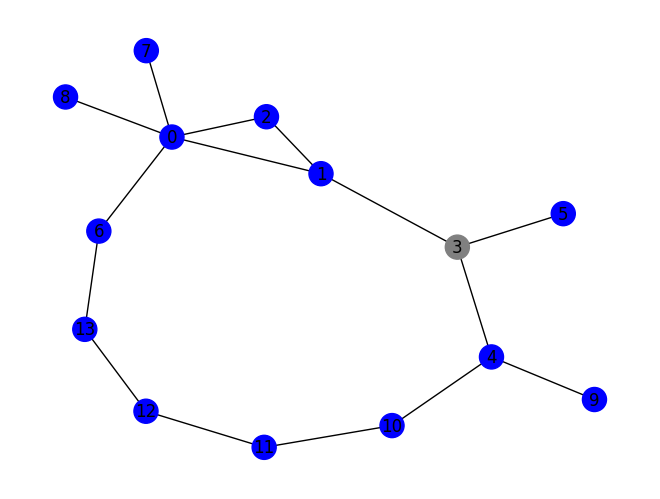

In [2]:
# delete example
edge_list = [(0,2), (1,2), (1,3), (5,3), (3,4), (1,0),(0,6), (0,7), (0,8), (4,9), (4,10), (10,11), (11,12), (12,13), (6,13)]
G = AdjacencyListGraph()
for u,v in edge_list:
    G.addEdge(u, v)
G.paintVert(3,'Grey')
G.visualize()

In [3]:

def BFS(G, s, visualize = False , anim_list = None):
  predecessors = [ None ] * G.numVerts() # predecessors[u] = v значит, что предшественником вершины u была вершина v
  destinations = [0]* G.numVerts() # destination from sourse vert to dest[u]
  for u in range(G.numVerts()):
    G.paintVert(u,'Blue')

  Queue = deque() # вспомогательная очередь

  #enter first vert
  G.paintVert(s,'Green')
  destinations[s] = 0
  Queue.append(s)

  if (visualize):
    G.saveFrame()

  #main loop
  while len(Queue) > 0:
    u  = Queue.popleft()
    for v in G.adjacency_list[u]: # для всех вершин смежных с u
      if G.color_map[v] == 'Blue':
        G.color_map[v] = 'Green'
        destinations[v] = destinations[u] + 1
        Queue.append(v)
    G.color_map[u] = 'Gray'

    if (visualize):
      G.saveFrame()
  anim = None
  if (visualize):
    anim_list.append(G.animate())
  return anim



In [6]:

#%matplotlib widget
#%matplotlib notebook#

anim_list = []
BFS(G,3,True, anim_list = anim_list)
#uncomment to show
#HTML(anim_list[0].to_html5_video())

### Оценка сложности поиска в ширину

<details>
    <summary>ОТВЕТ:</summary>
&emsp;


*   Операция внесения в очередь и удаления из нее требуют $O(1)$ времени
  *   => Общее время работы с очередью это $O(V)$
*   Затраты на инициализацию - $O(V)$
*   Kаждое ребро проходится не более 2х раз
  *   => Время работы $O(E)$
*   Общее время работы $BFS$ = $O(V+E)$
</details>



### Кратчайший путь
**Длина кратчайшего пути** - $\delta(s,v)$ от  $s$ до $v$  - минимальное количество ребер на каком-либо пути от $s$ к $v$


**Т.2.1** - Алгоритм поиска в ширину в процессе своей работы находит кратчайшее расстояние от исходной вершины $s$ ко всем остальным вершинам
<details>
    <summary>Доказательство:</summary>
&emsp;

*  По индукции?
*  Очевидно, для непосредственных соседей расстояние вычисляется верно - база индукции
*  Если верно на k-ом шаге, докажем, что верно на k+1-m
*  Рассмотрим  дугу $(u,v)$ на очередном шаге , нас интересуют только голубые вершины $v$
*  Возможно ли что путь $\delta(s,v) \ne \delta(s,u) + 1 $ ?
  * это бы значилло, что существует путь от другой вершины $y$, при этом  $\delta(s,v) > \delta(s,y)$
  * могла ли быть вершина $y$ еще не рассмотрена?
    * в очередь верщины попадают в порядке неуменьшения расстояния от основной вершины
    * =>  вершина $y$ была рассмотрена, и вершшина $v$ не может быть синей
</details>


## Поиск в глубину


$DFS(G)$<br>
$\quad$$for$ (для) каждой вершины $u \in V[G]$<br>
$\quad$$\quad$$do$ $color[u] \leftarrow BLUE$ <br>
$\quad$$\quad$$\quad$$\pi[u] \leftarrow NIL$ <br>
$\quad$$time \leftarrow 0$<br>
$\quad$$for$ (для) каждой вершины $u \in V[G]$<br>
$\quad$$\quad$$do$ $if$ $color[u]  =  BLUE$<br>
$\quad$$\quad$$\quad$$then$ $DFS\_Visit(u)$<br><br>
$DFS\_Visit(u)$<br>
$\quad$$color[u] \leftarrow GREEN$<br>
$\quad$$time \leftarrow time +1$<br>
$\quad$$d[u] \leftarrow time$<br>
$\quad$$for$ (для) каждой вершины $v\in Adj[u]$<br>
$\quad$$\quad$$do$ $if$ $color[v] = BLUE$<br>
$\quad$$\quad$$\quad$$then$ $\pi[v] \leftarrow u$<br>
$\quad$$\quad$$\quad$$\quad$$DFS\_Visit(v)$<br>
$\quad$$color[u] \leftarrow GRAY$<br>
$\quad$$f[u] \leftarrow time \leftarrow time +1$

In [ ]:
def DFS(G, s, visualize = False , anim_list = None):
 # predecessors = [ None ] * G.numVerts() # predecessors[u] = v значит, что предшественником вершины u была вершина v
 # destinations = [0]* G.numVerts() # destination from sourse vert to dest[u]
  for u in range(G.numVerts()):
    G.paintVert(u,'Blue')

  #Queue = deque() # вспомогательная очередь

  #enter first vert
  G.paintVert(s,'Green')

  if (visualize):
    G.saveFrame()
  def visit_vert (u):
    for v in G.adjacency_list[u]: # для всех вершин смежных с u
      if G.color_map[v] == 'Blue':
         G.color_map[v] = 'Green'
         if (visualize):
           G.saveFrame()
         visit_vert (v)
    G.color_map[u] = 'Gray'
    if (visualize):
      G.saveFrame()

  visit_vert(s)
  anim = None
  if (visualize):
    anim_list.append(G.animate())
  return anim


In [ ]:
anim_list = []
G = AdjacencyListGraph()
for u,v in edge_list:
    G.addEdge(u, v)
DFS(G,3,True, anim_list = anim_list)

#uncomment to show
#HTML(anim_list[0].to_html5_video())

### Оценка сложности поиска в глубину

<details>
    <summary>ОТВЕТ:</summary>
&emsp;
*   Инициализация -  $O(V)$
*   Каждая вершина заходит в visit 1 раз - $O(V)$
*   Kаждое ребро проходится не более 2х раз
  *   => Время работы $O(E)$
*   Общее время работы $DFS$ = $O(V+E)$
</details>



### Классификация ребер при поиске в глубину
1. **Ребра деревьев (tree edges)** — это ребра графа $G_π$. Ребро $(u, v)$ является ребром дерева, если при исследовании этого ребра открыта вершина $v$.
2. **Обратные ребра (back edges)** — это ребра $(u, v)$, соединяющие вершину
$u$ с ее предком $v$ в дереве поиска в глубину. Ребра-циклы, которые могут встречаться в ориентированных графах, рассматриваются как обратные
ребра.
3. **Прямые ребра (forward edges)** — это ребра $(u, v)$, не являющиеся ребрами
дерева и соединяющие вершину $u$ с ее п отомком $v$ в дереве поиска в глубину.
4. **Перекрестные ребра (cross edges)** — все остальные ребра графа. Они могут
соединять вершины одного и того же дерева поиска в глубину, когда ни одна
из вершин не является предком другой, или соединять вершины в разных
деревьях

### Нумерация графа при поиске в глубину
https://en.wikipedia.org/wiki/Tree_traversal


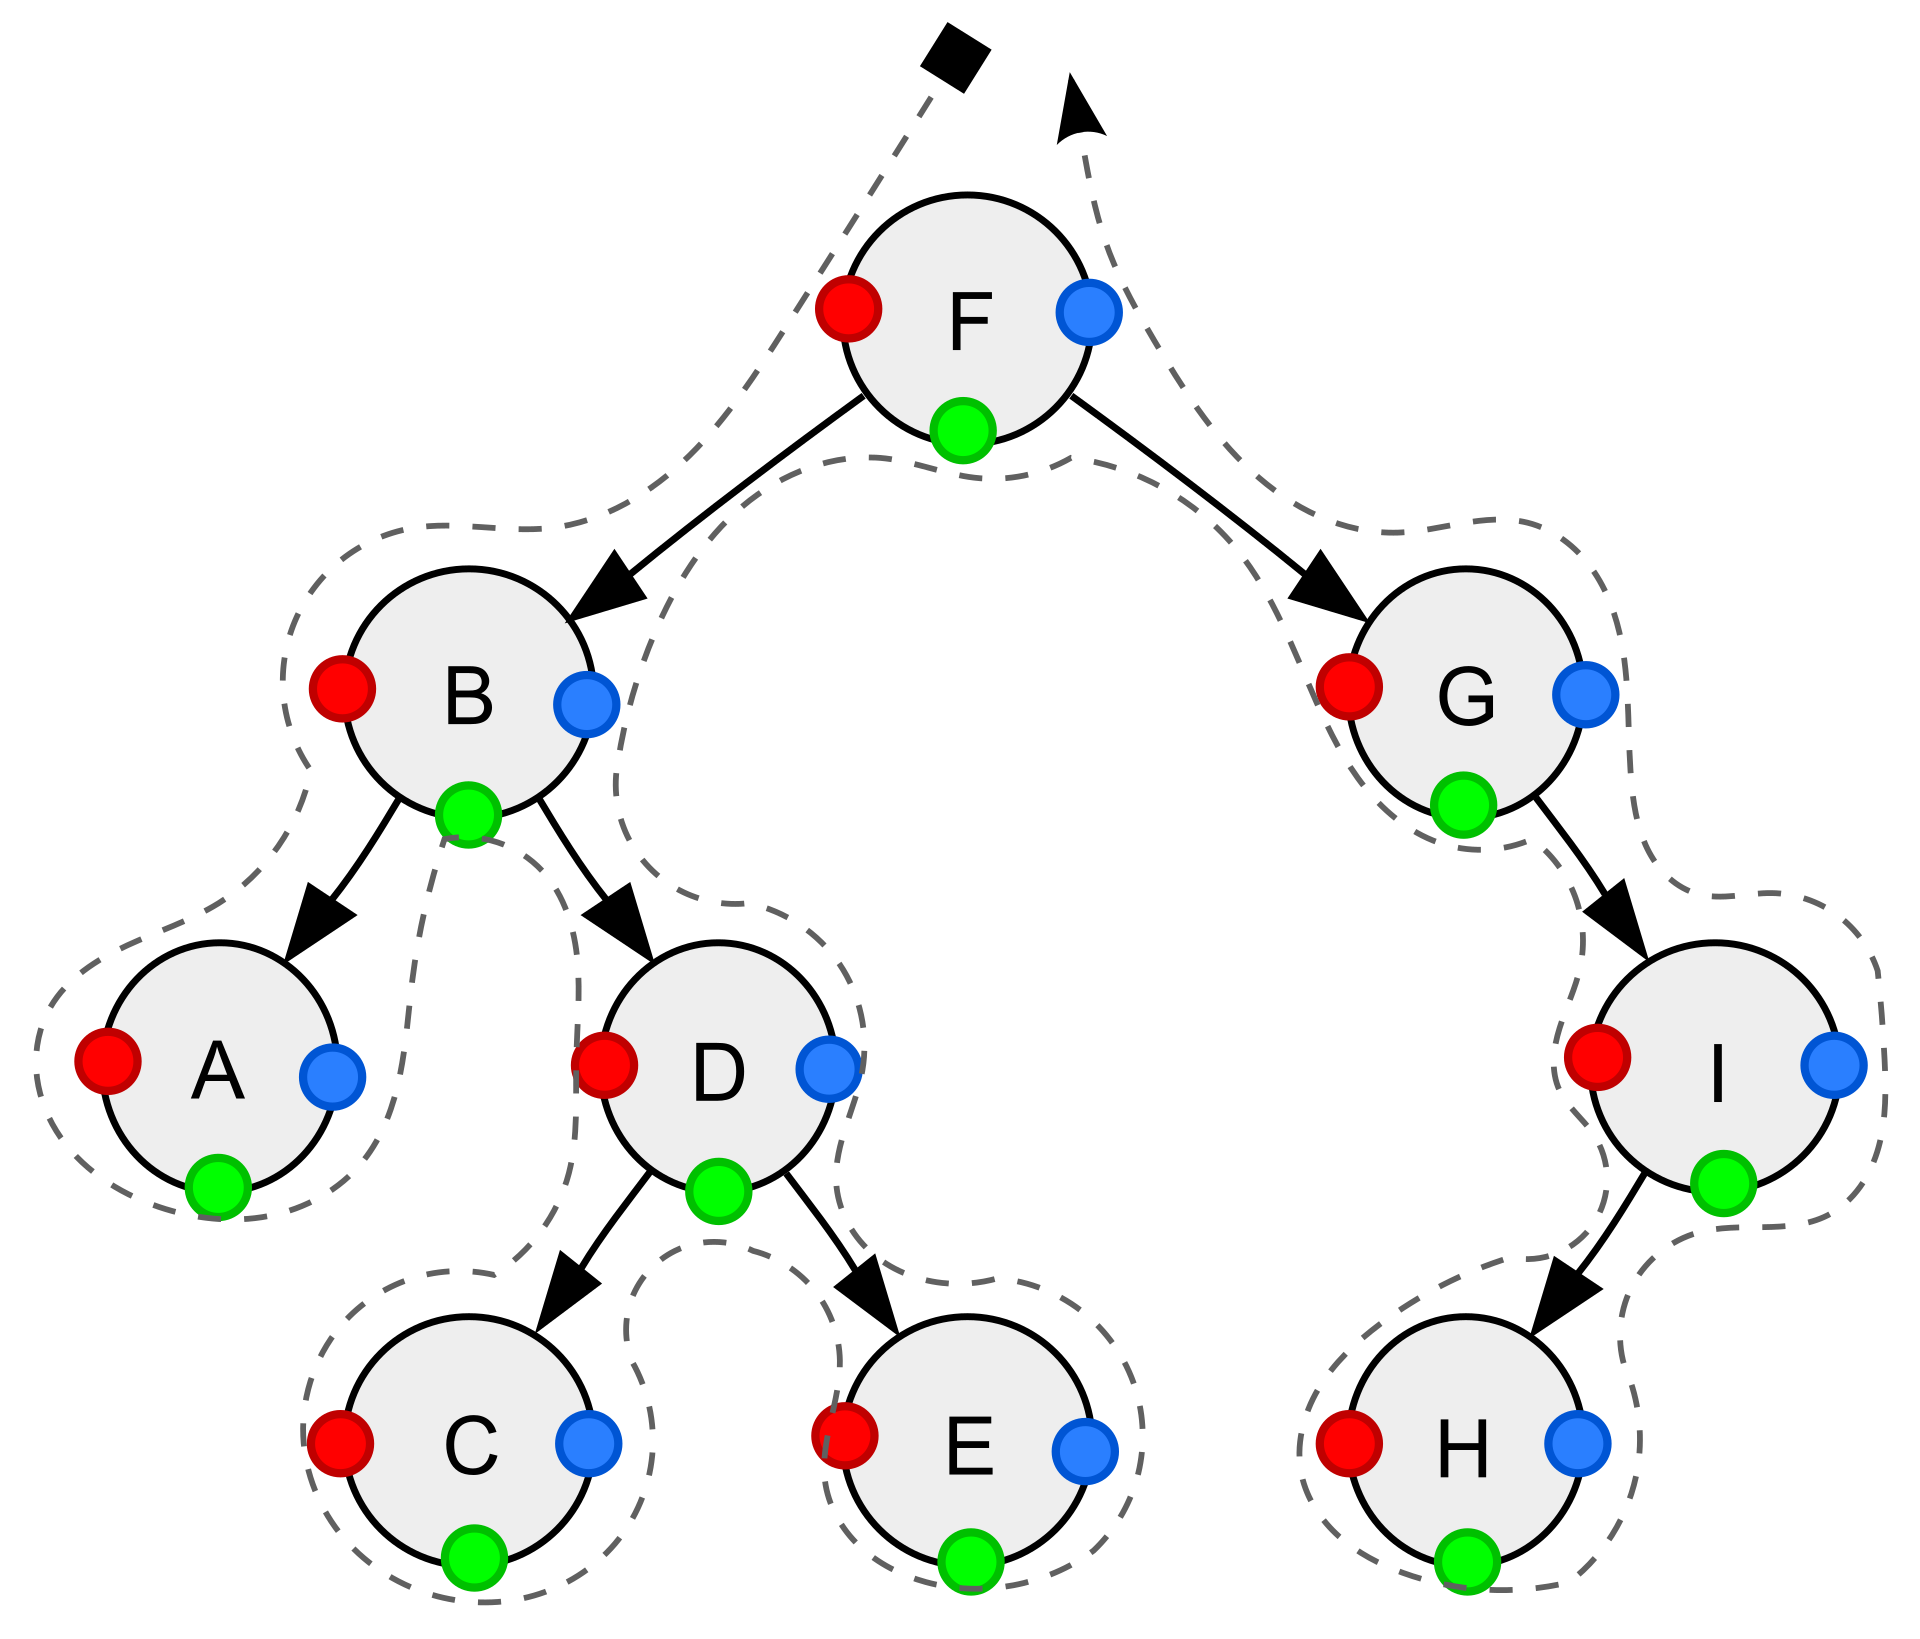

Depth-first traversal (dotted path) of a binary tree:

Pre-order (node visited at position red ●):

    F, B, A, D, C, E, G, I, H;

In-order (node visited at position green ●):

    A, B, C, D, E, F, G, H, I;

Post-order (node visited at position blue ●):

    A, C, E, D, B, H, I, G, F.

### Секретная картинка

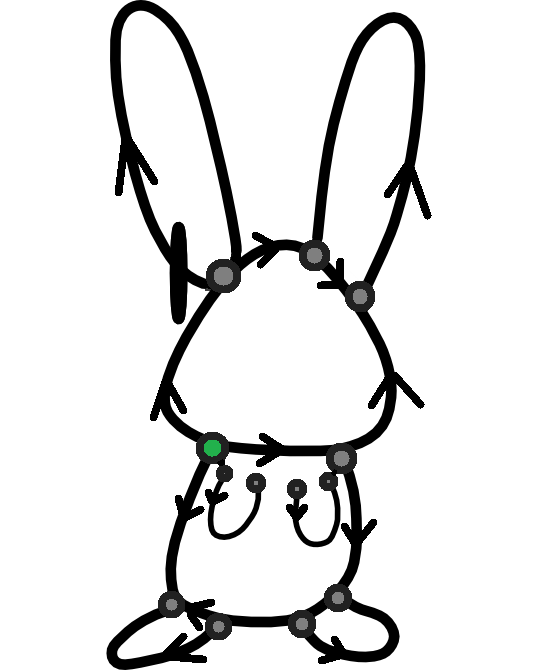

###Задачи

<details>
<summary>Задание 1:</summary>
&emsp;
Построить дерево поиска в глубину для этого графа
</details>
<details>
<summary>Задание 2:</summary>
&emsp;
Назвать обратные, прямые, перекрестные ребра графа
</details>
<details>
<summary>Задание 3:</summary>
&emsp;
Назвать RPO (reverse post order) нумерацию вергин графа
</details>

## Топологическая сортировка

1. **Топологическая сортировка** ориентированного ацикличного графа $G = (V,E)$ представляет собой такое линейное упорядочение всех его вершин, что
если граф $G$ содержит ребро $(u, v)$, то $u$ при таком упорядочении располагается
до $v $  (*для не ацикличного грфафа, такая сортировка невозможна*).

$Topological\_Sort$<br>
$\quad$Вызов $DFS(G)$ для вычисления времени завершения $f[v]$ для каждой вершины $v$ <br>
$\quad$По завершении работы над вершиной внести ее в начало связанного списка <br>
$\quad$$return$ Связанный список вершин

сложность такой сортировки $O(V+E)$ т.к это сложность поиска в глубину $O(V+E)$   сложность вставки каждой вершины $V$ в список за $O(1)$

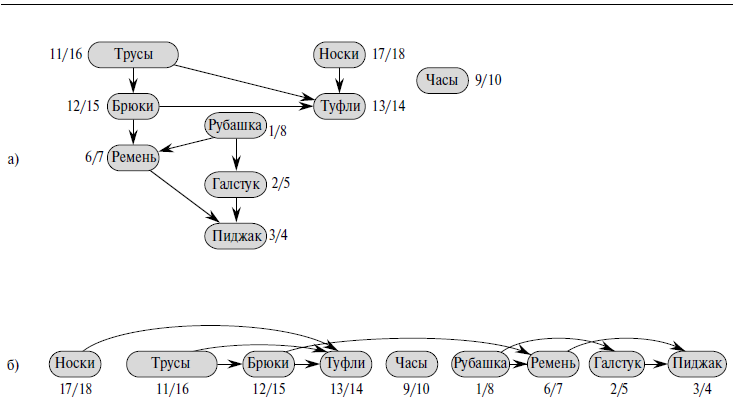

###Задачи

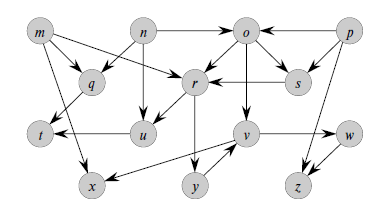

<details>
<summary>Задание 1:</summary>
&emsp;
Покажите, в каком порядке расположит вершины представленного на
рисунке ориентированного ациклического графа процедура TOPOLOGICAL_
SORT, если считать, что второй цикл for в процедуре DFS
сканирует вершины в алфавитном порядке, а также что все списки смежности упорядочены по алфавиту.
</details>
<details>
<summary>Задание 2*:</summary>
&emsp;
Разработайте алгоритм для определения, содержит ориентированный
граф $G = (V,E)$ цикл или нет. Ваш алгоритм должен выполняться за
время $O (V )$, независимо от $|E|$.
</details>
<details>
<summary>Задание 3*:</summary>
&emsp;
Докажите или опровергните следующее утверждение: если ориентиро-
ванный граф G содержит циклы, то процедура TOPOLOGICAL_SORT(G)
упорядочивает вершины таким образом, что при этом количество “пло-
хих” ребер (идущих в противоположном направлении) минимально.
</details>


#Сильно связанные компоненты

**Сильно связный компонент** **(strongly connected)** ориентированного
графа $G = (V,E)$ представляет собой максимальное множество вершин $C ⊆ V$ ,
такое что для каждой пары вершин $u$ и $v$ из $C$  $u$ достижимо из $v$, а $v$ достижимо из $u$

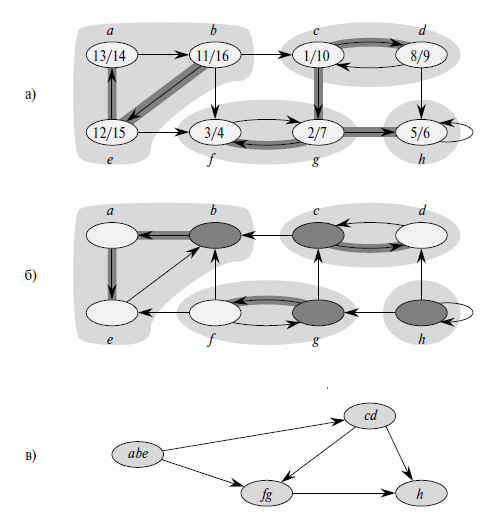

$STRONGLY\_CONNECTED\_COMPONENTS(G)$<br>
1. Вызов $DFS(G)$ для вычисления времен завершения $f[u]$
для каждой вершины $u$
2. Построение $G^T$
3. Вызов $DFS(G^T)$, но в главном цикле процедуры $DFS$,
вершины рассматриваются в порядке убывания значений $f[u]$
вычисленных в строке 1
4. Деревья леса поиска в глубину, полученного в строке 3
представляют собой сильно связные компоненты

$$G^T = (V,E^T), \; where \;E^T = \{(u,v):(v,u)\in E\}$$

Идея, лежащая в основе этого алгоритма, опирается на ключевое свойство **графа компонентов (component graph)** $G^{SCC} = (V^{SCC},E^{SCC})$, который определяется следующим образом. Предположим, что $G$ имеет сильно связные компоненты
$C_1, C_2, . . . , C_k.$ Множество вершин $V^{SCC} = \{v_1, v_2, . . . , v_k\}$ состоит из вершин $v_i$ для каждого сильно связного компонента $C_i$ графа $G$. Если в $G$ имеется ребро $(x, y)$ для некоторых двух вершин $x ∈ C_i$ и $y ∈ C_j$ , то в графе компонент имеется
ребро $(v_i, v_j) ∈ E^{SCC}$. Другими словами, если сжать все ребра между смежны-
ми вершинами в каждом сильно связном компоненте графа $G$, мы получим граф
$G^{SCC}$ (вершинами которого являются сильно связные компоненты графа G).
Ключевое свойство графа компонентов заключается в том, что он представляет
собой ориентированный ациклический граф. (доказать?)

Лемма 22.14. Пусть $C$ и $C'$ — различные сильно связные компоненты в ориентированном графе $G = (V,E)$. Предположим, что имеется ребро $(u, v) ∈ E$, где
$u ∈ C$ и $v ∈ C'$. Тогда $f (C) > f (C')$

Следствие 22.15. Пусть $C$ и $C'$ — различные сильно связные компоненты в ориентированном графе $G = (V,E)$. Предположим, что имеется ребро $(u, v) ∈ E^T$,
где $u ∈ C$ и $v ∈ C'$. Тогда $f (C) < f (C')$.